# <font color = 'red'> Bike Sharing Assignment </font>

### Problem Statement
A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Process going to be followed,

>**Step 1:** Reading and Understanding the Data<br>
**Step 2:** Visualising the Data<br>
**Step 3:** Data Preparation<br>
**Step 4:** Splitting the Data into Training and Testing Sets<br>
**Step 5:** Building a linear model<br>
**Step 6:** Residual Analysis of the train data<br>
**Step 7:** Making Predictions Using the Final Model<br>
**Step 8:** Model Evaluation<br>

### Step 1: Reading and Understanding the Data
Let's start with,

- Importing data using the pandas library
- Understanding the structure of the data

In [2]:
# Importing pandas and numpy

import pandas as pd
import numpy as np

In [3]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [200]:
# Reading the given csv file

bike_sharing = pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [201]:
bike_sharing.shape

(730, 16)

In [202]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- We don't have any null values.
- We have both categorical and continuous variable.
- Our target variable - **cnt**

In [203]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Dropping unnecassary variables,
- instant - record index
- dteday - we have gathered the useful insights from this variable and derived multiple variables already. So dropping it.
- casual + registered = cnt
- casual - A part of the target variable `cnt`. So dropping it. 
- registered - A part of the target variable `cnt`. So dropping it.

In [204]:
# Dropping instant, dteday, casual & registered variables

bike_sharing.drop(['instant','casual','dteday','registered'],axis=1,inplace=True)

In [205]:
bike_sharing.shape

(730, 12)

### Step 2: Visualising the Data
- Let's see if we can find some strong predictors here itself or any obvious multicollinearity going on.

In [206]:
# Import required libraries seaborn and matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

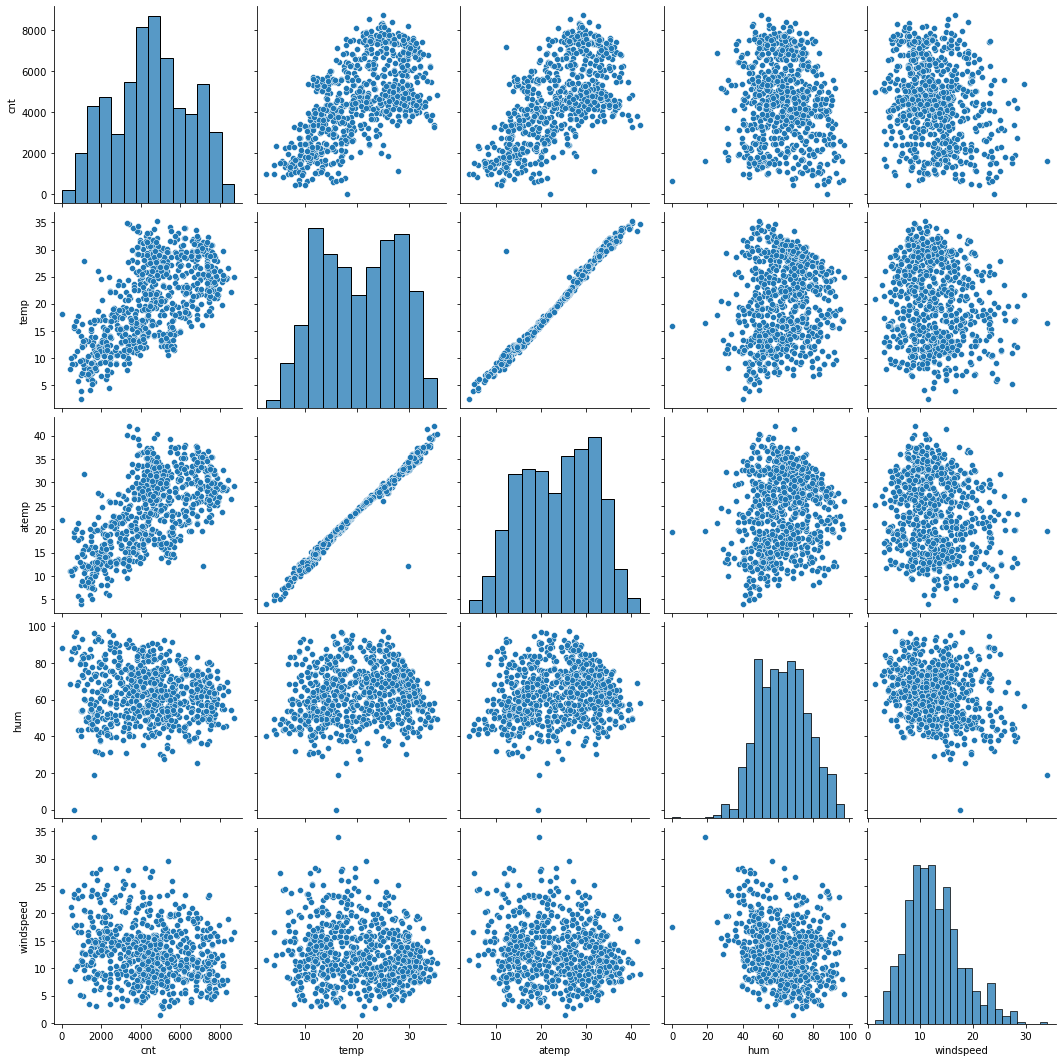

In [207]:
sns.pairplot(bike_sharing[['cnt','temp','atemp','hum','windspeed']],size=3, aspect=1, kind='scatter')
plt.show()

From the above pair plots our insights are,
- temp and atemp are very highly correlated.
- temp have some pattern with cnt.
- Again atemp also have some pattern with cnt, Since temp and atemp are highly correlated.
- hum, windspeed don't have much pattern with any of the others.

Let's conform it with correlation matrix.

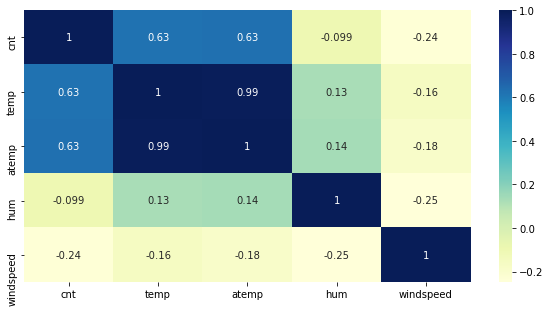

In [208]:
plt.figure(figsize=(10,5))
sns.heatmap(bike_sharing[['cnt','temp','atemp','hum','windspeed']].corr(),cmap='YlGnBu',annot=True)
plt.show()

From the heatmap, we can conform that temp and atemp are highly correlated (0.99). So I am dropping one of them, as it will lead to multicollinearity.

In [209]:
# Dropping atemp variable

bike_sharing.drop(['atemp'],axis=1,inplace=True)

Let's see boxplot of all these numerical variables

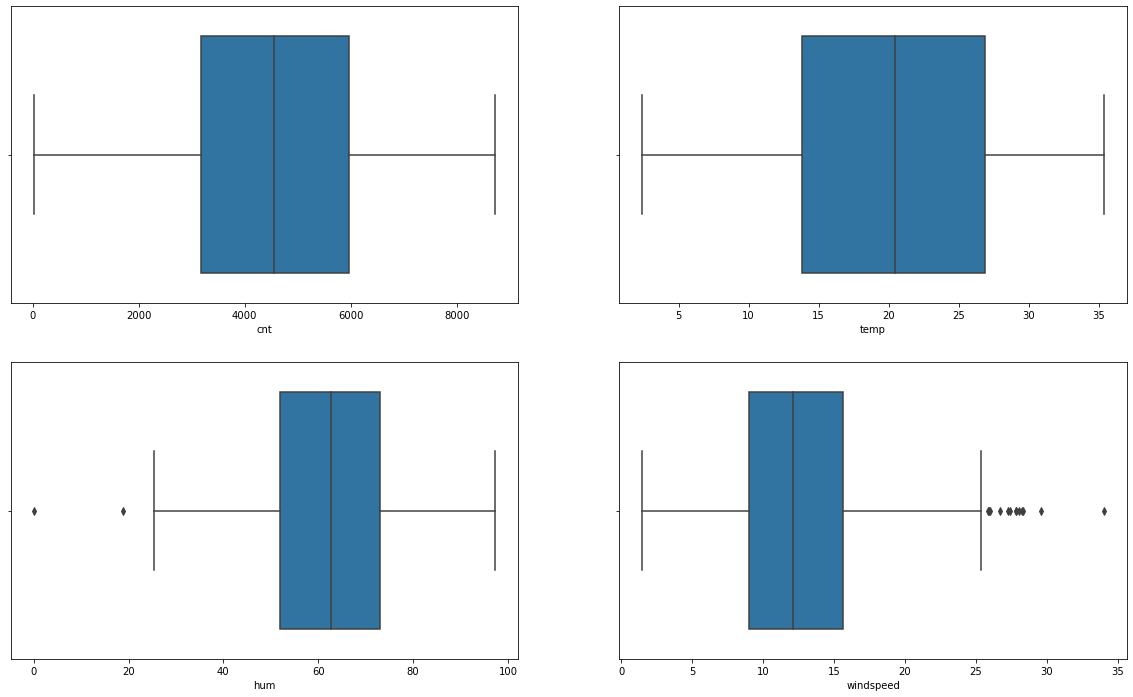

In [210]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(data=bike_sharing, x='cnt')
plt.subplot(2,2,2)
sns.boxplot(data=bike_sharing, x='temp')
plt.subplot(2,2,3)
sns.boxplot(data=bike_sharing, x='hum')
plt.subplot(2,2,4)
sns.boxplot(data=bike_sharing, x='windspeed')
plt.show()

- We have some ignorable outliers in hum and windspeed.
So moving forward

### Visualising Categorical Variables
Let's make a boxplot of all the categorical variables.

I am not converting the values of categorical variables with their respective keywords given in data dictionary because it will be easier to plot. I will handle it in Data Preparing.

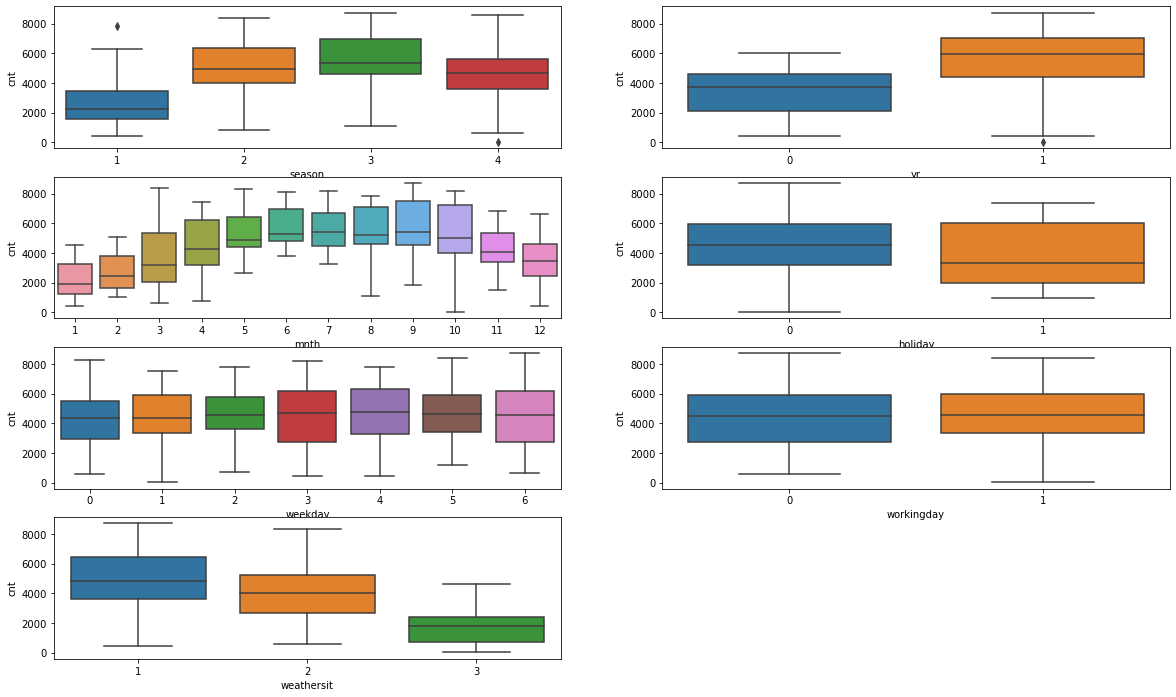

In [211]:
plt.figure(figsize=(20,12))
plt.subplot(4,2,1)
sns.boxplot(data=bike_sharing, x='season' , y='cnt')
plt.subplot(4,2,2)
sns.boxplot(data=bike_sharing, x='yr' , y='cnt')
plt.subplot(4,2,3)
sns.boxplot(data=bike_sharing, x='mnth' , y='cnt')
plt.subplot(4,2,4)
sns.boxplot(data=bike_sharing, x='holiday' , y='cnt')
plt.subplot(4,2,5)
sns.boxplot(data=bike_sharing, x='weekday' , y='cnt')
plt.subplot(4,2,6)
sns.boxplot(data=bike_sharing, x='workingday' , y='cnt')
plt.subplot(4,2,7)
sns.boxplot(data=bike_sharing, x='weathersit' , y='cnt')
plt.show()

From the boxplots we can see,
- **Season** – `Fall` and `Summer` seasons have more rides while comparing the other two seasons.
    - Fall > Summer > Winter > Spring.
- **Month** - From `May` to `Sep`, we have more no. of rides while comparing start and end of the year.
- **Weekday** - Couldn’t see much of a pattern. Data is almost equally scattered among the target variable.
- **Weather sit** – Out of given four levels in data dictionary. We have only three of them in our dataset. Among them, the correct pattern has been followed.
    - `Clear` weather has more count than `Mist` and 
    - `Mist` has more count than Light `rain/snow`
    - Clear > Mist > Light rain/snow.
- **Year** – Clearly `2019` have higher count when comparing to `2018`. 
    - 2019 > 2018
- **Holiday** – In holidays we have lesser rides. So, we could say the rides mostly used by students or working personals.
- **Working day** – Same as holiday, in working day we have more rides. But not very much.


### Step 3: Data Preparation

We have some categorical variables which first 
- need to be replaced with their respective keyword from data dictionary 
- and then according to their levels need to create dummy variables.

In [212]:
# Replacing with their respective keywords from data dictionary
# season
bike_sharing.season.replace([1,2,3,4],['spring','summer','fall','winter'],inplace=True)

# mnth
bike_sharing.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"dec"],inplace=True)

# weekday
bike_sharing.weekday.replace([0,1,2,3,4,5,6],['Tu','We','Th','Fr','Sa','Su','Mo'],inplace=True)

# weathersit
bike_sharing.weathersit.replace([1,2,3,4],['Clear','Mist','light rain/snow','heavy rain/snow'],inplace=True)


In [213]:
bike_sharing.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mo,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tu,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,We,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Th,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fr,1,Clear,9.305237,43.6957,12.522300,1600


In [214]:
bike_sharing.shape

(730, 11)

#### Creating Dummy Variables
1. Variable `Season` has `four` levels. So we would get `three` dummy variables.
2. Variable `mnth` has `12` levels. So we would get `11` dummy variables.
3. Variable `weekday` has `seven` levels. So we would get `six` dummy variables.
4. Variable `weathersit` has `three` levels. So we would get `two` dummy variables.

In [215]:
# Creating new dataframe with the dummy variables and dropping the original column and one of the levels
bike_sharing_fin = pd.get_dummies(bike_sharing,columns=['season','mnth','weekday','weathersit'],drop_first=True)

In [216]:
bike_sharing_fin.shape

(730, 29)

In [217]:
bike_sharing_fin.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'mnth_dec', 'weekday_Mo',
       'weekday_Sa', 'weekday_Su', 'weekday_Th', 'weekday_Tu', 'weekday_We',
       'weathersit_Mist', 'weathersit_light rain/snow'],
      dtype='object')

In [218]:
bike_sharing_fin.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,mnth_dec,weekday_Mo,weekday_Sa,weekday_Su,weekday_Th,weekday_Tu,weekday_We,weathersit_Mist,weathersit_light rain/snow
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 4: Splitting the Data into Training and Testing Sets
Spliting our data into 70-30 train and test

In [219]:
# importing necessary library

from sklearn.model_selection import train_test_split

In [220]:
# we specify this so that the train and test data set always have the same rows

df_train,df_test= train_test_split(bike_sharing_fin, train_size=0.7, test_size=0.3, random_state=100)

#### Rescaling some of the features using MinMax scaler

In [221]:
# importing necessary library

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [222]:
# Applying scaler() for temp, hum, windspeed and scale them between 0 and 1

num_vars=['temp','hum','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,mnth_dec,weekday_Mo,weekday_Sa,weekday_Su,weekday_Th,weekday_Tu,weekday_We,weathersit_Mist,weathersit_light rain/snow
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,1,...,0,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1796,1,0,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,1,0,0,0,0,0,1,0


Not scaling `cnt` since it is our target variable

In [223]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,mnth_dec,weekday_Mo,weekday_Sa,weekday_Su,weekday_Th,weekday_Tu,weekday_We,weathersit_Mist,weathersit_light rain/snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,...,0.080392,0.084314,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,...,0.272166,0.278131,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see all the `max values are 1` and `min values are 0`(Excluding cnt)

#### Dividing into X and Y sets for the model building

In [224]:
y_train = df_train.pop('cnt')
X_train = df_train

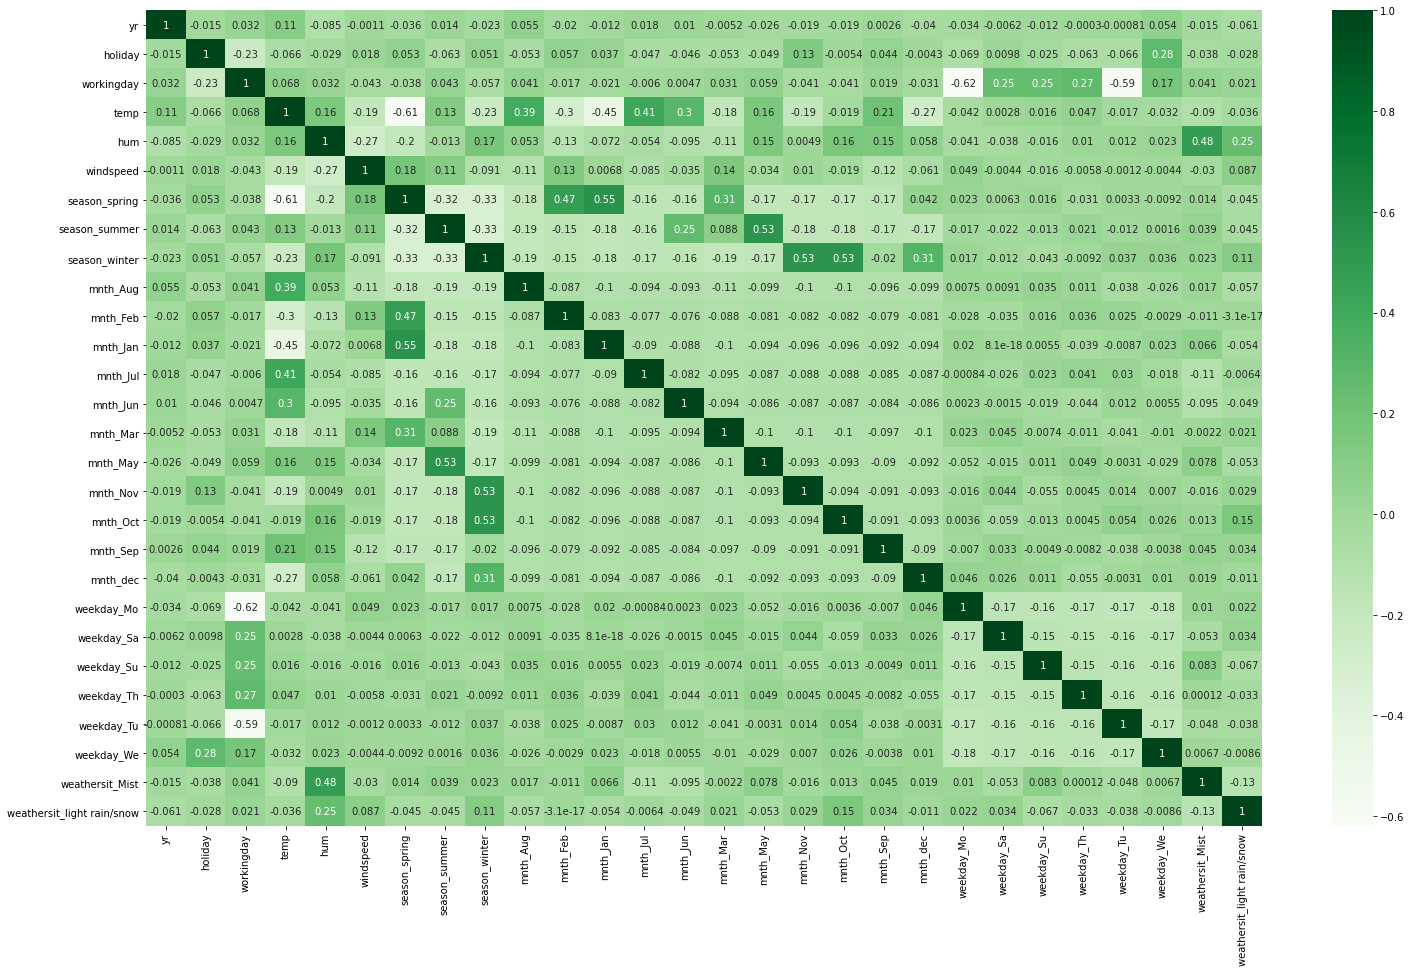

In [225]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

With the help of this heatmap, let's start building our model. Before that let's use `RFE`(Recursive feature elimination) and get `top 15 features`

### Step 5: Building a linear model

In [226]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### Building model using sklearn- RFE

In [227]:
# Running RFE and getting top 15 features
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [228]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('mnth_dec', False, 4),
 ('weekday_Mo', True, 1),
 ('weekday_Sa', False, 12),
 ('weekday_Su', False, 10),
 ('weekday_Th', False, 9),
 ('weekday_Tu', True, 1),
 ('weekday_We', False, 8),
 ('weathersit_Mist', True, 1),
 ('weathersit_light rain/snow', True, 1)]

In [229]:
# Getting the top 15 columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Mo', 'weekday_Tu', 'weathersit_Mist',
       'weathersit_light rain/snow'],
      dtype='object')

- Using `RFE` we have come down `from 29` features to `top 15` features. 
- Now, let's use statsmodel and see the detailed summary of the features.

#### Building model using statsmodel, for the detailed statistics

In [230]:
# Creating X_train_rfe dataframe using RFE selected features
X_train_rfe = X_train[col]

In [231]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [232]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [233]:
# Let's see the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.13e-191
Time:                        05:10:44   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

`holiday` is insignificant in presence of other variables, so dropping it.

In [234]:
X_train_new = X_train_rfe.drop(['holiday'],axis=1)

Let's rebuild without holiday

#### Model 2: Without Holiday

In [235]:
# Adding a constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Let's see the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.13e-191
Time:                        05:11:22   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [236]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Mo', 'weekday_Tu', 'weathersit_Mist',
       'weathersit_light rain/snow'],
      dtype='object')

In [237]:
# Let's remove constant and check VIF

X_train_new = X_train_new.drop(['const'],axis=1)

In [238]:
# Let's calculate VIF, to see if there is a multicollineararity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,weekday_Mo,4.91
4,windspeed,4.90
5,season_spring,4.80
11,weekday_Tu,4.76
7,season_winter,3.71
6,season_summer,3.03
12,weathersit_Mist,2.31


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

#### Dropping the variable and updating the model
Firstly, we can see that `hum` having very high VIF 32.14. So let's drop it.

In [239]:
X_train_new = X_train_new.drop(['hum'],axis=1)

### Model 3: After removing hum

In [240]:
# Adding a constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Let's see the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.73e-189
Time:                        05:11:37   Log-Likelihood:                -4117.1
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [241]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mo',
       'weekday_Tu', 'weathersit_Mist', 'weathersit_light rain/snow'],
      dtype='object')

In [242]:
# Let's remove constant and check VIF again

X_train_new = X_train_lm.drop(['const'],axis=1)

In [243]:
# Let's calculate VIF, to see if there is a multicollineararity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
9,weekday_Mo,4.45
10,weekday_Tu,4.21
4,season_spring,3.82
6,season_winter,2.80
5,season_summer,2.75
0,yr,2.07
7,mnth_Jul,1.60


#### Dropping the variable and updating the model
Clearly we can see that `workingday` having very high VIF 16.19. So let's drop it.

In [244]:
X_train_new = X_train_new.drop(['workingday'],axis=1)

### Model 4: After removing workingday

In [245]:
# Adding a constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Let's see the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.01e-186
Time:                        05:11:44   Log-Likelihood:                -4125.3
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     497   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [246]:
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mo', 'weekday_Tu',
       'weathersit_Mist', 'weathersit_light rain/snow'],
      dtype='object')

In [247]:
# Let's remove constant and check VIF again

X_train_new = X_train_lm.drop(['const'],axis=1)

In [248]:
# Let's calculate VIF, to see if there is a multicollineararity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,season_summer,2.23
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
6,mnth_Jul,1.59
10,weathersit_Mist,1.55
7,mnth_Sep,1.33
8,weekday_Mo,1.22


#### Dropping the variable and updating the model

Now, even though `temp` have VIF greater than 5. `weekday_Mo` has become insignificant. So first let's drop insignificant variable `weekday_Mo`.

In [249]:
X_train_new = X_train_new.drop(['weekday_Mo'],axis=1)

### Model 5: After removing weekday_Mo

In [250]:
# Adding a constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Let's see the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.65e-187
Time:                        05:11:51   Log-Likelihood:                -4126.2
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     498   BIC:                             8327.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [251]:
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Tu',
       'weathersit_Mist', 'weathersit_light rain/snow'],
      dtype='object')

In [252]:
# Let's remove constant and check VIF again

X_train_new = X_train_lm.drop(['const'],axis=1)

In [253]:
# Let's calculate VIF, to see if there is a multicollineararity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.60
4,season_summer,2.22
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
6,mnth_Jul,1.59
9,weathersit_Mist,1.55
7,mnth_Sep,1.33
8,weekday_Tu,1.17


#### Dropping the variable and updating the model

Even after dropping `weekday_Mo`, The VIF is almost same for`temp`. So first let's drop it.

In [254]:
X_train_new = X_train_new.drop(['temp'],axis=1)

### Model 6: After removing temp

In [255]:
# Adding a constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Let's see the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.2
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          3.10e-149
Time:                        05:11:58   Log-Likelihood:                -4219.5
No. Observations:                 510   AIC:                             8461.
Df Residuals:                     499   BIC:                             8508.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [256]:
X_train_new.columns

Index(['yr', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Jul', 'mnth_Sep', 'weekday_Tu', 'weathersit_Mist',
       'weathersit_light rain/snow'],
      dtype='object')

In [257]:
# Let's remove constant and check VIF again

X_train_new = X_train_lm.drop(['const'],axis=1)

In [258]:
# Let's calculate VIF, to see if there is a multicollineararity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
1,windspeed,3.82
2,season_spring,2.08
3,season_summer,2.02
0,yr,1.83
4,season_winter,1.76
8,weathersit_Mist,1.51
5,mnth_Jul,1.21
7,weekday_Tu,1.16
6,mnth_Sep,1.15
9,weathersit_light rain/snow,1.08


#### Dropping the variable and updating the model

Now, VIF seems to be good for all the variables. But `mnth_Jul` has become insignificant. So let's drop it.

In [259]:
X_train_new = X_train_new.drop(['mnth_Jul'],axis=1)

### Model 7: After removing mnth_Jul

In [260]:
# Adding a constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Let's see the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.44e-150
Time:                        05:12:09   Log-Likelihood:                -4219.6
No. Observations:                 510   AIC:                             8459.
Df Residuals:                     500   BIC:                             8502.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Even after dropping mnth_Jul, the model's Rsquare and adjusted Rsquare remains the same. And now all the features are significant.

In [261]:
X_train_new.columns

Index(['yr', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Sep', 'weekday_Tu', 'weathersit_Mist',
       'weathersit_light rain/snow'],
      dtype='object')

In [262]:
# Let's remove constant and check VIF again

X_train_new = X_train_lm.drop(['const'],axis=1)

In [263]:
# Let's calculate VIF, to see if there is a multicollineararity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
1,windspeed,3.49
2,season_spring,1.91
3,season_summer,1.86
0,yr,1.78
4,season_winter,1.64
7,weathersit_Mist,1.50
6,weekday_Tu,1.15
5,mnth_Sep,1.13
8,weathersit_light rain/snow,1.08


- VIF also seems to be good for all the variables. So **let's finalize the model**. 
- Let's check the error terms.

### Step 6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [264]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Error')

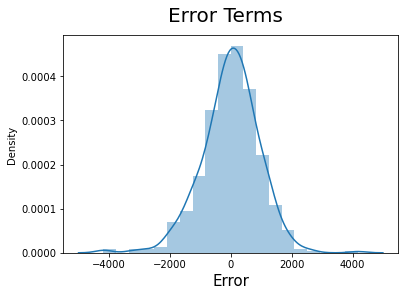

In [265]:
# Let's plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred),bins=20)

# plot heading
fig.suptitle('Error Terms',fontsize=20)

# X-label
plt.xlabel('Error',fontsize=15)

The residuals are well `normally distributed` with the mean 0. So `our model is a good fit`.

Text(0, 0.5, 'Residual')

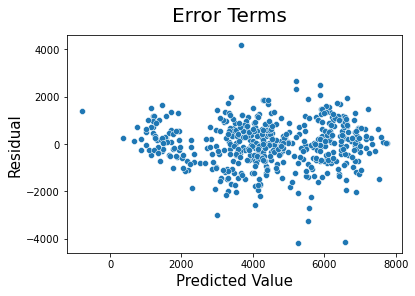

In [266]:
# Let's plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(y=(y_train - y_train_pred),x=y_train_pred)

# plot heading
fig.suptitle('Error Terms',fontsize=20)

# X-label
plt.xlabel('Predicted Value',fontsize=15)

# Y-label
plt.ylabel('Residual',fontsize=15)

The probablity distribution of the errors has constant variance - **homoscedasticity**
- We can see that most of the values equally divided from zero and have same distance.

Error values are statistically independent - **Independence of Error**
- We couldn't see much of a pattern in the error values. So it is statistically independent.

### Step 7: Making Predictions Using the Final Model
We have our final model and checked the normality of error terms. So let's predict the test set with the model.

#### Applying the scaling on the test sets

In [267]:
# Applying scaler() for temp, hum, windspeed and only transforming it.

num_vars=['temp','hum','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,mnth_dec,weekday_Mo,weekday_Sa,weekday_Su,weekday_Th,weekday_Tu,weekday_We,weathersit_Mist,weathersit_light rain/snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,4546.981735,0.255708,0.264840,0.232877,...,0.086758,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,1898.633630,0.437258,0.442259,0.423633,...,0.282125,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,5869.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here, we can see max and min are not exactly 1 and 0. Since we scalled after spliting train and test.

#### Dividing into X_test and y_test

In [268]:
y_test = df_test.pop('cnt')
X_test = df_test

In [269]:
# let's drop the variables which are not in our final model
X_test_lm = X_test[X_train_new.columns]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test_lm)

In [270]:
# Let's predict from our final model

y_test_pred = lm.predict(X_test_lm)

### Step 8: Model Evaluation

#### <font color='red'> Checking the R-squared on the test set </font>

In [271]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7482853326710998

- The train set r_squared is `0.764`
- And test set r_Squared is `0.748`
which is very closer.<br>

So our model will perform good on the future/new data sets as well.

#### <font color='red'> Our Final Model </font>

In [273]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.44e-150
Time:                        05:14:57   Log-Likelihood:                -4219.6
No. Observations:                 510   AIC:                             8459.
Df Residuals:                     500   BIC:                             8502.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

The eqation of our best fitted model is <Br>
    
$cnt = 5111.5319 + yr \times 2151.7311 - windspeed \times 1498.5568 - season spring \times 2596.8759 - season summer \times 362.7919 - season winter \times 653.8492 + mnth Sep \times 611.8474 - weekday Tu \times 396.7705 - weathersit Mist \times 788.0897 - weathersit light rain/snow \times 2585.2421$